In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from scipy.ndimage import imread
import json
import gzip
import tarfile
import random
from hangul_utils import split_syllable_char, split_syllables, join_jamos
%matplotlib inline
plt.rcParams['image.cmap'] = 'Greys'

print("packs loaded")
%connect_info

packs loaded
{
  "hb_port": 37416,
  "shell_port": 56665,
  "transport": "tcp",
  "kernel_name": "",
  "iopub_port": 39579,
  "ip": "127.0.0.1",
  "signature_scheme": "hmac-sha256",
  "control_port": 55576,
  "stdin_port": 54117,
  "key": "db3a19fd-d241-4ad9-bc7d-3eb7092ce1bf"
}

Paste the above JSON into a file, and connect with:
    $> ipython <app> --existing <file>
or, if you are local, you can connect with just:
    $> ipython <app> --existing /run/user/128932/jupyter/kernel-77a0fd46-ca49-4d95-a850-3d607e6db076.json 
or even just:
    $> ipython <app> --existing 
if this is the most recent IPython session you have started.


In [3]:
index_data_ko = []

with gzip.open('data/ko/index.json.gz', 'rt') as arc:
    index_data_ko.extend(json.load(arc))
    print("ko index loaded")
    
with tarfile.open('data/ko/data.tar.gz', "r|*") as tar:
    print("tar opened")
    img_data_ko = []
    for i, member in enumerate(index_data_ko):
        if i%10000 == 1:
            print("%2.0f%% complete (%d / %d)" % (i / len(index_data_ko) * 100, i, len(index_data_ko)))
        ti = tar.next()
        if ti.name != member['path']:
            print("ERROR: order doesn't match")
            break;
        f = tar.extractfile(ti)
        img_data_ko.append(1 - (imread(f)/255))
    img_ko = np.array(img_data_ko)
    del img_data_ko
    print("ko image loaded")

ko index loaded
tar opened
 0% complete (1 / 211500)
 5% complete (10001 / 211500)
 9% complete (20001 / 211500)
14% complete (30001 / 211500)
19% complete (40001 / 211500)
24% complete (50001 / 211500)
28% complete (60001 / 211500)
33% complete (70001 / 211500)
38% complete (80001 / 211500)
43% complete (90001 / 211500)
47% complete (100001 / 211500)
52% complete (110001 / 211500)
57% complete (120001 / 211500)
61% complete (130001 / 211500)
66% complete (140001 / 211500)
71% complete (150001 / 211500)
76% complete (160001 / 211500)
80% complete (170001 / 211500)
85% complete (180001 / 211500)
90% complete (190001 / 211500)
95% complete (200001 / 211500)
99% complete (210001 / 211500)
ko image loaded


In [4]:
ko_chset_cho = ["ㄱ", "ㄲ", "ㄴ", "ㄷ", "ㄸ", "ㄹ", "ㅁ", "ㅂ", "ㅃ", "ㅅ", "ㅆ", "ㅇ", "ㅈ", "ㅉ", "ㅊ", "ㅋ", "ㅌ", "ㅍ", "ㅎ"]
ko_chset_jung = ["ㅏ", "ㅐ", "ㅑ", "ㅒ", "ㅓ", "ㅔ", "ㅕ", "ㅖ", "ㅗ", "ㅘ", "ㅙ", "ㅚ", "ㅛ", "ㅜ", "ㅝ", "ㅞ", "ㅟ", "ㅠ", "ㅡ", "ㅢ", "ㅣ"]
ko_chset_jong = ["X", "ㄱ", "ㄲ", "ㄳ", "ㄴ", "ㄵ", "ㄶ", "ㄷ", "ㄹ", "ㄺ", "ㄻ", "ㄼ", "ㄽ", "ㄾ", "ㄿ", "ㅀ", "ㅁ", "ㅂ", "ㅄ", "ㅅ", "ㅆ", "ㅇ", "ㅈ", "ㅊ", "ㅋ", "ㅌ", "ㅍ", "ㅎ"]

label_ko_cho = np.zeros([img_ko.shape[0], len(ko_chset_cho)])
label_ko_jung = np.zeros([img_ko.shape[0], len(ko_chset_jung)])
label_ko_jong = np.zeros([img_ko.shape[0], len(ko_chset_jong)])
for i, member in enumerate(index_data_ko):
    splited = split_syllable_char(member['target'])
    label_ko_cho[i][ko_chset_cho.index(splited[0])] = 1
    label_ko_jung[i][ko_chset_jung.index(splited[1])] = 1
    if len(splited) < 3:
        label_ko_jong[i][0] = 1
    else:
        label_ko_jong[i][ko_chset_jong.index(splited[2])] = 1
        
label_ko = np.concatenate((label_ko_cho, label_ko_jung, label_ko_jong), axis=1)
del label_ko_cho
del label_ko_jung
del label_ko_jong
    
print("ko label loaded")

ko label loaded


In [5]:
def getIndex(l, indexes):
    return [l[i] for i in indexes]

def shuffle(n, *lists):
    perm = np.random.permutation(n)
    lists = list(lists)
    for i in range(len(lists)):
        if hasattr(lists[i], "shape"):
            lists[i] = lists[i][perm]
        else:
            lists[i] = getIndex(lists[i], perm)
    return tuple(lists)

img_ko, label_ko, index_data_ko = shuffle(
    img_ko.shape[0], img_ko, label_ko, index_data_ko)

print("shuffled")

shuffled


(211500, 32, 32)
{'weight': 'BOLD', 'path': '0107277.png', 'target': '솰', 'font': 'Dotum'}
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


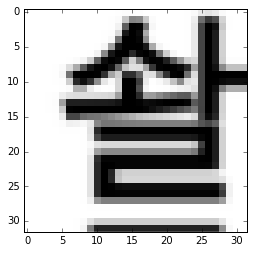

In [12]:
print(img_ko.shape)
plt.figure()
plt.imshow(img_ko[0], interpolation='none')
print(index_data_ko[0])
print(label_ko[0])

In [131]:
trainimg = img_ko[:-5000]
trainlabel = label_ko[:-5000]
testimg = img_ko[-5000:]
testlabel = label_ko[-5000:]
randidx = np.random.randint(trainimg.shape[0], size=2)

def get_batch(i, batch_size, input_var):
    if batch_size > input_var.shape[0]:
        return input_var
    start = (i*batch_size)%input_var.shape[0]
    overflow = start + batch_size - input_var.shape[0]
    if overflow <= 0:
        return input_var[start:start+batch_size]
    else:
        return np.r_[input_var[start:], input_var[:overflow]]
    
def flatten_cnn(layer):
    layer_shape = layer.get_shape().as_list()
    n_out = layer_shape[1] * layer_shape[2] * layer_shape[3]
    return tf.reshape(layer, [-1, n_out])

def build_nn(shape, X):
    n_before = int(X.get_shape()[1])
    W = tf.Variable(tf.truncated_normal([n_before, shape], stddev=0.1))
    b = tf.Variable(tf.constant(0.1, shape=[shape]))
    return tf.matmul(X, W)+b

def build_cnn(cnn_shape, patch_shape, X, stride=1):
    n_before = int(X.get_shape()[3])
    W = tf.Variable(tf.truncated_normal([patch_shape[0], patch_shape[1], n_before, cnn_shape], stddev=0.1))
    b = tf.Variable(tf.constant(0.1, shape=[cnn_shape]))
    layer = tf.nn.relu(tf.nn.conv2d(X, W, strides=[1, stride, stride, 1], padding='SAME') + b)
    return layer

def max2d_pool(layer):
    return tf.nn.max_pool(layer, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

print("function loaded")

function loaded


In [134]:
X = tf.placeholder(tf.float32, [None, 32, 32])
Y = tf.placeholder(tf.float32, [None, label_ko.shape[1]])
keep_prob = tf.placeholder(tf.float32)

Y_cho = tf.slice(Y, [0, 0], [-1, len(ko_chset_cho)])
Y_jung = tf.slice(Y, [0, len(ko_chset_cho)], [-1, len(ko_chset_jung)])
Y_jong = tf.slice(Y, [0, len(ko_chset_cho)+len(ko_chset_jung)], [-1, len(ko_chset_jong)])

# Small inception model
# http://laonple.blog.me/220704822964
X_reshape = tf.reshape(X, [-1, 32, 32, 1])
cnn_1_5 = build_cnn(12, [5,5], X_reshape)
cnn_1_3 = build_cnn(36, [3,3], X_reshape)
cnn_1_concat = tf.concat(3, [cnn_1_5, cnn_1_3])
cnn_1_pool = max2d_pool(cnn_1_concat) # 16 * 16 * 48

cnn_2_5 = build_cnn(18, [5,5], cnn_1_pool)
cnn_2_3 = build_cnn(48, [3,3], cnn_1_pool)
cnn_2_1 = build_cnn(30, [1,1], cnn_1_pool)
cnn_2_concat = tf.concat(3, [cnn_2_5, cnn_2_3, cnn_2_1])
cnn_2_pool = max2d_pool(cnn_2_concat) # 8 * 8 * 96

cnn_3_5_reduce = build_cnn(18, [1,1], cnn_2_pool)
cnn_3_5 = build_cnn(36, [5,5], cnn_3_5_reduce)
cnn_3_3_reduce = build_cnn(64, [1,1], cnn_2_pool)
cnn_3_3 = build_cnn(96, [3,3], cnn_3_3_reduce)
cnn_3_1 = build_cnn(60, [1,1], cnn_2_pool)
cnn_3_concat = tf.concat(3, [cnn_3_5, cnn_3_3, cnn_3_1])
cnn_3_pool = max2d_pool(cnn_3_concat) # 4 * 4 * 192

dense_1 = tf.nn.relu(build_nn(1024, flatten_cnn(cnn_3_pool)))
dropout_1 = tf.nn.dropout(dense_1, keep_prob)

logit = build_nn(label_ko.shape[1], dropout_1)
logit_cho = tf.slice(logit, [0, 0], [-1, len(ko_chset_cho)])
logit_jung = tf.slice(logit, [0, len(ko_chset_cho)], [-1, len(ko_chset_jung)])
logit_jong = tf.slice(logit, [0, len(ko_chset_cho)+len(ko_chset_jung)], [-1, len(ko_chset_jong)])
h_cho = tf.nn.softmax(logit_cho)
h_jung = tf.nn.softmax(logit_jung)
h_jong = tf.nn.softmax(logit_jong)

learning_rate = tf.placeholder(tf.float32)
cost_cho = tf.nn.softmax_cross_entropy_with_logits(logit_cho, Y_cho)
cost_jung = tf.nn.softmax_cross_entropy_with_logits(logit_jung, Y_jung)
cost_jong = tf.nn.softmax_cross_entropy_with_logits(logit_jong, Y_jong)
cost = cost_cho + cost_jung * 1.5 + cost_jong * 0.5
cost_mean = tf.reduce_mean(cost) # mean of batch set

train = tf.train.AdamOptimizer(learning_rate).minimize(cost)

correct_cho = tf.equal(tf.argmax(Y_cho,1), tf.argmax(h_cho,1))
correct_jung = tf.equal(tf.argmax(Y_jung,1), tf.argmax(h_jung,1))
correct_jong = tf.equal(tf.argmax(Y_jong,1), tf.argmax(h_jong,1))
correct_two = tf.logical_or(tf.logical_and(correct_cho, tf.logical_or(correct_jung, correct_jong)),
                           tf.logical_and(correct_jung, correct_jong))
correct_all = tf.logical_and(tf.logical_and(correct_cho, correct_jung), correct_jong)
accuracy = tf.reduce_mean(tf.cast(correct_all, tf.float32))
accuracy_two = tf.reduce_mean(tf.cast(correct_two, tf.float32))
accuracy_cho = tf.reduce_mean(tf.cast(correct_cho, tf.float32))
accuracy_jung = tf.reduce_mean(tf.cast(correct_jung, tf.float32))
accuracy_jong = tf.reduce_mean(tf.cast(correct_jong, tf.float32))

sess = tf.Session()
print("session loaded")

session loaded


In [143]:
def init_session():
    sess.run(tf.initialize_all_variables())
    print("session initialized")
    
def train_accuracy():
    trainsize = trainimg.shape[0]
    batchsize = 100
    batch_per_epoch = int(trainsize/batchsize)
    train_accuracy = 0
    for i in range(batch_per_epoch):
        batch_x = get_batch(i, batchsize, trainimg)
        batch_y = get_batch(i, batchsize, trainlabel)
        train_accuracy += sess.run(accuracy, feed_dict={X:batch_x, Y:batch_y, keep_prob:1})
    return train_accuracy / batch_per_epoch
    
def print_accuracy():
    taccuracy, taccuracy_cho, taccuracy_jung, taccuracy_jong, taccuracy_two = \
            sess.run((accuracy, accuracy_cho, accuracy_jung, accuracy_jong, accuracy_two), feed_dict={X:testimg, Y:testlabel, keep_prob:1})
    print ("test accuracy = %.3f" % taccuracy)
    print ("two of three = %.3f" % taccuracy_two)
    print ("cho = %.3f" % taccuracy_cho)
    print ("jung = %.3f" % taccuracy_jung)
    print ("jong = %.3f" % taccuracy_jong)
    print ("train accuracy = %.3f" % train_accuracy())

def do_training(is_console=False, lr_init = 0.003):
    trainsize = trainimg.shape[0]
    batchsize = 100
    batch_per_epoch = int(trainsize/batchsize)
    print ("Training %d, mini-batch %d * %d" % (trainsize, batchsize, batch_per_epoch))

    lr = lr_init
    for i in range(batch_per_epoch*5):
        if i % 200 == 0 :
            taccuracy, taccuracy_cho, taccuracy_jung, taccuracy_jong, taccuracy_two = \
            sess.run((accuracy, accuracy_cho, accuracy_jung, accuracy_jong, accuracy_two), feed_dict={X:testimg, Y:testlabel, keep_prob:1})
            print ("%6dth epoch : test accuracy = %.3f                  " % \
                   (i / batch_per_epoch, taccuracy))
            
        if i % batch_per_epoch == 0 :
            print ("                 two of three = %.3f" % taccuracy_two)
            print ("                 cho = %.3f" % taccuracy_cho)
            print ("                 jung = %.3f" % taccuracy_jung)
            print ("                 jong = %.3f" % taccuracy_jong)

        batch_x = get_batch(i, batchsize, trainimg)
        batch_y = get_batch(i, batchsize, trainlabel)
        cur_cost = sess.run((train, cost_mean), feed_dict={X:batch_x, Y:batch_y, keep_prob:0.5, learning_rate:lr})[1]
        if(is_console):
            print ("%dth... lr = %.2e, cost = %.2e\r" % (i, lr, cur_cost), end="")
        lr = lr * (1 - 0.0003)
    print("train complete--------------------------------")
    print_accuracy()
    
def error_check(pred_label_tuple):
    h, y = pred_label_tuple
    n_error = np.zeros([y.shape[0], y.shape[0]])
    n_all = np.zeros(y.shape[0])

    for i in range(y.shape[0]):
        n_all[np.argmax(y[i])] += 1
        if (np.argmax(h[i]) != np.argmax(y[i])):
            n_error[np.argmax(y[i])][np.argmax(h[i])] += 1


    print ("Error rate")
    for i, ch in enumerate(ko_chset_jung):
        most_error = np.argmax(n_error[i])
        print ("%s : %2.0f%% (%4d / %4d)" %
               (ch, float(np.sum(n_error[i])) / n_all[i] * 100, np.sum(n_error[i]), n_all[i]), end="")
        if n_error[i][most_error] > 0:
            print ("%6d errors with %s" % (n_error[i][most_error], ko_chset_jung[most_error]))
        else:
            print ("")

In [146]:
print_accuracy()

test accuracy = 0.997
two of three = 1.000
cho = 1.000
jung = 0.998
jong = 0.999
train accuracy = 0.999


In [145]:
error_check(sess.run((h_jung, Y_jung), feed_dict={X:testimg, Y:testlabel, keep_prob:1}))

Error rate
ㅏ :  0% (   0 /  490)
ㅐ :  0% (   0 /  376)
ㅑ :  0% (   0 /  152)
ㅒ :  0% (   0 /   38)
ㅓ :  0% (   1 /  421)     1 errors with ㅕ
ㅔ :  0% (   0 /  290)
ㅕ :  0% (   0 /  271)
ㅖ :  1% (   1 /   75)     1 errors with ㅔ
ㅗ :  0% (   1 /  400)     1 errors with ㅡ
ㅘ :  0% (   0 /  171)
ㅙ :  0% (   0 /   95)
ㅚ :  0% (   0 /  215)
ㅛ :  1% (   1 /  137)     1 errors with ㅡ
ㅜ :  0% (   0 /  379)
ㅝ :  0% (   0 /  126)
ㅞ :  0% (   0 /   89)
ㅟ :  0% (   0 /  214)
ㅠ :  0% (   0 /  190)
ㅡ :  1% (   2 /  398)     2 errors with ㅜ
ㅢ :  0% (   0 /   79)
ㅣ :  1% (   4 /  394)     4 errors with ㅏ
